# Eye state classification using CNN
---
build model binary classification with MRL Eye Dataset

##Download dữ liệu

In [1]:
!wget http://mrl.cs.vsb.cz/data/eyedataset/mrlEyes_2018_01.zip
!unzip mrlEyes_2018_01.zip

Streaming output truncated to the last 5000 lines.
 extracting: mrlEyes_2018_01/s0037/s0037_05259_1_1_0_0_0_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05260_1_1_0_0_0_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05261_1_1_0_0_0_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05262_1_1_0_0_1_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05263_1_1_0_0_1_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05264_1_1_0_0_0_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05265_1_1_0_0_1_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05266_1_1_0_0_0_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05267_1_1_0_0_0_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05268_1_1_0_0_0_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05269_1_1_0_0_0_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05270_1_1_0_0_0_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05271_1_1_0_0_0_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05272_1_1_0_0_0_01.png  
 extracting: mrlEyes_2018

## Import module

In [3]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,AveragePooling2D,Conv2D,BatchNormalization, MaxPool2D
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout, ZeroPadding2D, Activation, Dense, Input, Add
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import activations
from keras.preprocessing.image import ImageDataGenerator

## Load dataset

In [47]:
def get_label(img_file_name):
  # file name: subjectID_imageID_gender_glasses_eyestate_reflections_lightingconditions_sensorID.png
  # eye state: [0 - closed, 1 - open]
  label = img_file_name.split('_')[4]
  if label == '0':
    return 0
  else:
    return 1

In [48]:
def load_data(folder_dir, IMG_SIZE):
  X,y = [], []

  # Chay tung folder
  for person_dir in os.listdir(folder_dir):
    # Kiem tra la folder hay la file
    path_folder_image = os.path.join(folder_dir, person_dir)
    if os.path.isdir(path_folder_image):
      for image_name in os.listdir(path_folder_image):

        path_image = os.path.join(path_folder_image, image_name)

        # load img
        img = image.load_img(path_image, target_size=(IMG_SIZE, IMG_SIZE), color_mode='grayscale')
        img_data = image.img_to_array(img)

        X.append(img_data)
        label = get_label(image_name)
        y.append(label)
    
  # normalize
  X = np.asarray(X)/255.0
  y = np.asarray(y)

  print('Loading completed.')

  return X, y

In [49]:
FOLDER_DIR = '/content/mrlEyes_2018_01'
IMG_SIZE = 64

In [50]:
X, y = load_data(FOLDER_DIR, IMG_SIZE)

Loading completed.


In [51]:
print(len(y))
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

84898


{0: 41946, 1: 42952}

## Build mạng CNN
---
Vì đây là mạng binary , nên layer cuối mang activation sigmoid

In [52]:
def get_model():

  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape = (IMG_SIZE, IMG_SIZE, 1), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3, 3)))

  model.add(Conv2D(64, (3, 3), input_shape = (IMG_SIZE, IMG_SIZE, 1), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3, 3)))

  model.add(Conv2D(128, (3, 3), input_shape = (IMG_SIZE, IMG_SIZE, 1), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3, 3)))
  
  model.add(Flatten())

  model.add(Dense(128, activation = 'relu'))

  model.add(Dense(1, activation = 'sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [53]:
model = get_model()

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

## Split train:test 8:2

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
print(len(y_train))
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

67918


{0: 33569, 1: 34349}

In [57]:
print(len(y_test))
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

16980


{0: 8377, 1: 8603}

## Training

In [60]:
H = model.fit(X_train, y_train, epochs=10,batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
531/531 [==============================] - 215s 405ms/step - loss: 0.0304 - accuracy: 0.9885 - val_loss: 0.0393 - val_accuracy: 0.9859
Epoch 2/10
531/531 [==============================] - 200s 377ms/step - loss: 0.0277 - accuracy: 0.9897 - val_loss: 0.0368 - val_accuracy: 0.9871
Epoch 3/10
531/531 [==============================] - 201s 378ms/step - loss: 0.0269 - accuracy: 0.9902 - val_loss: 0.0366 - val_accuracy: 0.9870
Epoch 4/10
531/531 [==============================] - 200s 376ms/step - loss: 0.0275 - accuracy: 0.9899 - val_loss: 0.0392 - val_accuracy: 0.9855
Epoch 5/10
531/531 [==============================] - 207s 389ms/step - loss: 0.0259 - accuracy: 0.9907 - val_loss: 0.0515 - val_accuracy: 0.9841
Epoch 6/10
531/531 [==============================] - 201s 379ms/step - loss: 0.0252 - accuracy: 0.9908 - val_loss: 0.0376 - val_accuracy: 0.9874
Epoch 7/10
531/531 [==============================] - 199s 376ms/step - loss: 0.0229 - accuracy: 0.9912 - val_loss: 0.0359 -

## Evaluate

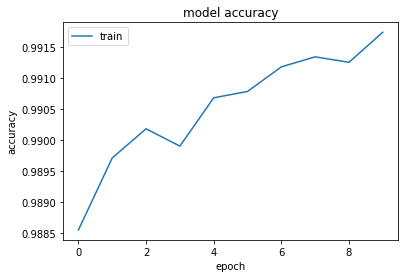

In [61]:
plt.plot(H.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

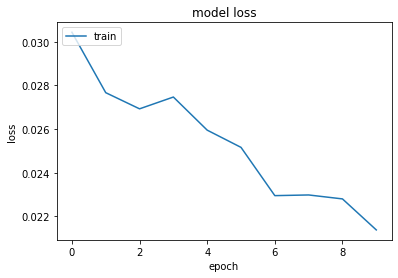

In [62]:
plt.plot(H.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [63]:
_, acc = model.evaluate(X_test, y_test)
acc * 100

531/531 [==============================] - 15s 29ms/step - loss: 0.0421 - accuracy: 0.9854


98.53945970535278

In [65]:
import cv2

In [67]:
img = cv2.imread('/content/mrlEyes_2018_01/s0001/s0001_00001_0_0_0_0_0_01.png', 0)

In [68]:
img = cv2.resize(img, (64, 64))

In [70]:
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=3)

## save model

In [64]:
model.save('eye_detect.h5')